In [1]:
import nibabel as nib
import nilearn.plotting as nplot
import trimesh
import numpy as np
import os
import matplotlib.pyplot as plt
import nilearn.image as nimg
import niviz.surface
from mpl_toolkits import mplot3d
from itertools import product

In [2]:
# Set up example file
sub = 'sub-LA1LA20002'
scratch = '/scratch/jjeyachandra/niviz/demo-hcppipelines/data/'
space = 'MNINonLinear'
surf_space = "fsaverage_LR32k"

In [3]:
shortname = {
    "Native": 'native',
    "fsaverage_LR32k": "32k_fs_LR",
    "": "164k_fs_LR"
}
volname = {
    "T1w": "T1w_acpc_dc.nii.gz",
    "MNINonLinear": "T1w.nii.gz"
}
l_surf = nib.load(
    os.path.join(
        scratch, sub, space, surf_space,
    f'{sub}.L.inflated.{shortname[surf_space]}.surf.gii'
))
r_surf = nib.load(
    os.path.join(
        scratch, sub, space, surf_space,
    f'{sub}.R.inflated.{shortname[surf_space]}.surf.gii'
))

surfmap = nib.load(
    os.path.join(
        scratch, sub, space, surf_space,
        f"{sub}.MyelinMap.{shortname[surf_space]}.dscalar.nii"
    )
)

sulc = nib.load(
    os.path.join(
        scratch, sub, space, surf_space,
        f"{sub}.sulc.{shortname[surf_space]}.dscalar.nii"
    )
)

In [45]:
lv, lt, lm = niviz.surface.map_cifti_to_gifti(l_surf, surfmap)
rv, rt, rm = niviz.surface.map_cifti_to_gifti(r_surf, surfmap)

_, _, slm = niviz.surface.map_cifti_to_gifti(l_surf, sulc)
_, _, srm = niviz.surface.map_cifti_to_gifti(r_surf, sulc)

In [5]:
num_maps = 1
num_views = 2

In [6]:
views = ['lateral', 'medial']
hemi_map = {
    "left": (lv, lt, lm),
    "right":(rv, rt, rm)
}
sulc_map = {
    "left": slm,
    "right": srm
}

In [52]:
vmin, vmax = np.nanpercentile(rm[0, :], [2, 98])

In [57]:
d = surfmap.get_fdata()
vmin, vmax = np.nanpercentile(d, [2, 98])

i_view=0
hemi=0
i_view=1
hemi=0
i_view=0
hemi=1
i_view=1
hemi=1


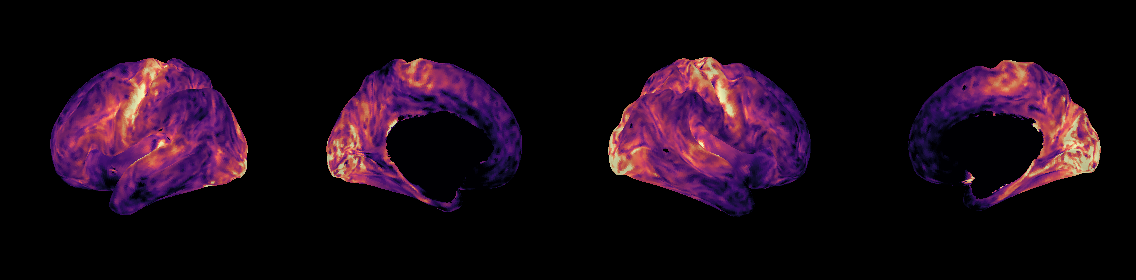

In [62]:
w, h = plt.figaspect(num_maps / (num_views * 2))
fig, axs = plt.subplots(num_maps, num_views*2,
                       subplot_kw={'projection':'3d'},
                       figsize=(w, h))
fig.set_facecolor("black")
fig.tight_layout()



for i,a in enumerate(axs.flat):
    a.set_facecolor("black")
    
    i_map = i // (num_views * 2)    
    i_view = (i // (i_map + 1)) % num_views
    print(f"i_view={i_view}")
    
    view = views[i_view]
    
    hemi = i // 2
    print(f"hemi={hemi}")
    if hemi == 0:
        display_map = hemi_map['left']
        display_bg = sulc_map['left']
        hemi = "left"
    else:
        display_map = hemi_map['right']
        display_bg = sulc_map['right']
        hemi = 'right'
    v, t, m = display_map
    m[np.isnan(m)] = 0 
    nplot.plot_surf(
        [v, t],
        surf_map=m,
        bg_map=display_bg,
        cmap='magma',
        axes=a,
        hemi=hemi,
        view=view,
        bg_on_data=True,
        darkness=0.3,
        vmin=vmin,
        vmax=vmax
    )
